# Welcome! 
In this brief tutorial, I will show you how to build a convolutional neural network using Keras. We will train our neural network
to recognize handwritten digits. 

![Image of ConvNet](https://raw.githubusercontent.com/NeilNie/LearnConvNets/master/image.jpg)

In [1]:
from __future__ import print_function
from keras.datasets import mnist
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## Dataset pre-processing
Keras has a very nice built in function to download the dataset online. 

In [19]:
#download mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's visualize the data using matplotlib

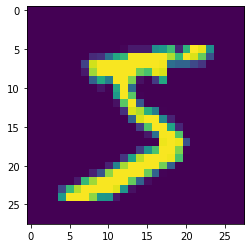

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

Now, we need to check the size of the images. They should be 28 pixels by 28 pixels.

In [21]:
#check image shape
x_train[0].shape

(28, 28)

Before we can train the model, let's quickly reshape our input data. There are 60,000 images in total. The `1` means that the images
don't have color (grayscale)

In [22]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [23]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


We need to convert the expected output values to one-hot encoding. 

In [24]:
from keras.utils import to_categorical

# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(60000, 10)


## Building the convolutional neural network
Finally, we are done with data preprocessing. We can finally start building and training our machine learning model. 

In [25]:
#create model
model = Sequential()

# add the first conv layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add the second conv layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# add a flatten layer
model.add(Flatten())

# add the first dense layer
model.add(Dense(128, activation='relu'))

# add a dense layer for classification
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 516,138
Trainable params: 516,138
Non-trainable params: 0
__________________________________________________

Once the model has been built, let's compile it using some optimizer and loss function and metrics. Once it has been compiled, 
we can start training. 

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Training the model

In [28]:
batch_size = 128
num_epoch = 10

In [29]:
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 41s 88ms/step - loss: 2.2691 - accuracy: 0.2060 - val_loss: 2.2392 - val_accuracy: 0.3262
Epoch 2/10
469/469 [==============================] - 36s 77ms/step - loss: 2.2019 - accuracy: 0.4124 - val_loss: 2.1557 - val_accuracy: 0.4813
Epoch 3/10
469/469 [==============================] - 37s 78ms/step - loss: 2.0992 - accuracy: 0.5111 - val_loss: 2.0274 - val_accuracy: 0.5494
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 1.9433 - accuracy: 0.5696 - val_loss: 1.8350 - val_accuracy: 0.6063
Epoch 5/10
469/469 [==============================] - 35s 76ms/step - loss: 1.7207 - accuracy: 0.6371 - val_loss: 1.5765 - val_accuracy: 0.6860
Epoch 6/10
469/469 [==============================] - 36s 76ms/step - loss: 1.4494 - accuracy: 0.7129 - val_loss: 1.2942 - val_accuracy: 0.7587
Epoch 7/10
469/469 [==============================] - 36s 76ms/step - loss: 1.1863 - accuracy: 0.7633 - val_loss: 1.0507 - val_accuracy:

## Testing the model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Saving and loading the model

In [30]:
from tensorflow.keras.models import load_model

model.save('my_MNIST_model')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_MNIST_model/assets


In [31]:
# loading the model
model = load_model('my_MNIST_model')

## Using the model

The first step is to load an image of a number that we want the model to predict. 

(28, 28)


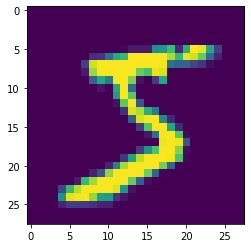

In [33]:
import cv2
import numpy as np

new_image = cv2.imread("./my_image_1.png", cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (28, 28))

print(new_image.shape)
plt.imshow(new_image)

new_image = np.expand_dims(new_image, 2)
image_data = np.expand_dims(new_image, 0)

new_image = new_image.astype(np.float32)
new_image /= 255

In [42]:
pred = model.predict(image_data)[0]
print(pred[3])

1.0
